In [110]:
#basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [111]:
device = torch.device("mps")

In [112]:
train_df = pd.read_csv('train.csv')

In [113]:
test_df = pd.read_csv('test.csv')

In [114]:
train_df.head() 

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [116]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [117]:
from ydata_profiling import ProfileReport
report = ProfileReport(train_df)
#report

<Axes: >

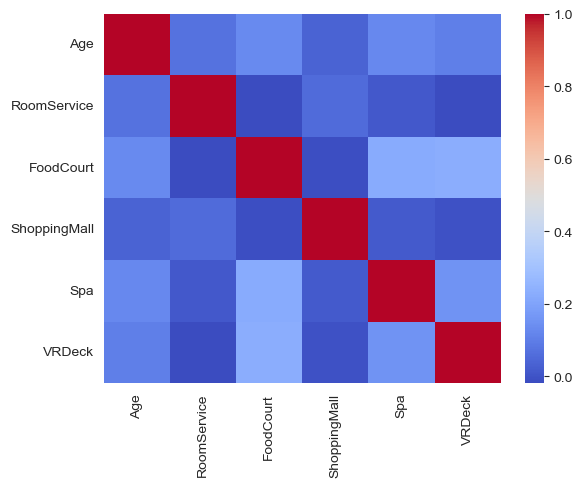

In [118]:
sns.heatmap(train_df.select_dtypes('number').corr(),cmap='coolwarm')

In [119]:
#missing percentage
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(train_df)

CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Name            2.300702
Cabin           2.289198
VRDeck          2.162660
FoodCourt       2.105142
Spa             2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
PassengerId     0.000000
Transported     0.000000
dtype: float64

In [120]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

FoodCourt       2.478373
Spa             2.361468
Cabin           2.338087
ShoppingMall    2.291326
Name            2.197802
CryoSleep       2.174421
VIP             2.174421
Destination     2.151040
Age             2.127660
HomePlanet      2.034136
RoomService     1.917232
VRDeck          1.870470
PassengerId     0.000000
dtype: float64

In [121]:
len(train_df.columns)

14

#### Cryosleep

In [122]:
pd.isna(train_df['CryoSleep']).sum()

217

In [123]:
cat_columns = ['HomePlanet', 'CryoSleep','Destination','VIP','cabin0', 'cabin_last']

In [124]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [125]:
train_df.tail()

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True

In [126]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat, _, _, _ = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

def calculate_cramers_v_for_column(df, target_col, cat_cols):
    return {
        col: cramers_v(df[target_col].dropna(), df[col].dropna())
        for col in cat_cols
        if col in df.columns
    }


In [127]:
train_df['cabin0'] = train_df['Cabin'].apply(lambda x : str(x).split('/')[0])

In [128]:
train_df['cabin0'].value_counts()

cabin0
F      2794
G      2559
E       876
B       779
C       747
D       478
A       256
nan     199
T         5
Name: count, dtype: int64

In [129]:
train_df['cabin_last'] = train_df['Cabin'].apply(lambda x : str(x).split('/')[-1])

In [130]:
train_df['cabin_last'].value_counts()

cabin_last
S      4288
P      4206
nan     199
Name: count, dtype: int64

In [131]:
train_df.drop('Cabin',axis=1,inplace=True)

In [132]:
test_df['cabin0'] = test_df['Cabin'].apply(lambda x : str(x).split('/')[0])

In [133]:
test_df['cabin_last'] = test_df['Cabin'].apply(lambda x : str(x).split('/')[-1])

In [134]:
test_df.drop('Cabin',axis=1,inplace=True)

In [135]:
calculate_cramers_v_for_column(train_df,'CryoSleep',cat_columns)

{'HomePlanet': 0.1185870016644907,
 'CryoSleep': 0.9997434351825434,
 'Destination': 0.12048708822467324,
 'VIP': 0.08057355569595007,
 'cabin0': 0.3319009184824688,
 'cabin_last': 0.03177677229535335}

In [136]:
spend_col = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df['Total_spending'] = 0
test_df['Total_spending'] = 0
for col in spend_col:
    train_df['Total_spending'] = train_df['Total_spending'] + train_df[col].fillna(0)
    test_df['Total_spending'] = test_df['Total_spending'] + test_df[col].fillna(0)

In [137]:
train_df.groupby('CryoSleep').describe()['Total_spending']

count         mean          std  min    25%     50%     75%  \
CryoSleep                                                                 
False      5439.0  2248.299687  3245.061489  0.0  746.0  1019.0  2416.0   
True       3037.0     0.000000     0.000000  0.0    0.0     0.0     0.0   

               max  
CryoSleep           
False      35987.0  
True           0.0

In [138]:
#total spending for cryosleep is zero
def fill_cryo(cols):
    cryo = cols[0]
    total = cols[1]
    if pd.isna(cryo) == True:
        if total == 0:
            return 1
        else:
            return 0
    else:
        return cryo
train_df['CryoSleep'] = train_df[['CryoSleep','Total_spending']].apply(fill_cryo,axis=1)
test_df['CryoSleep'] = test_df[['CryoSleep','Total_spending']].apply(fill_cryo,axis=1)

In [139]:
train_df['CryoSleep'] = train_df['CryoSleep'].apply(lambda x : 0 if x == False else 1)

In [140]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

ShoppingMall      4.863222
VIP               4.746318
HomePlanet        4.699556
Name              4.676175
VRDeck            4.395604
FoodCourt         4.278700
Spa               4.278700
Destination       4.255319
RoomService       4.231938
Age               4.185177
PassengerId       0.000000
CryoSleep         0.000000
Transported       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [141]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

FoodCourt         2.478373
Spa               2.361468
ShoppingMall      2.291326
Name              2.197802
VIP               2.174421
Destination       2.151040
Age               2.127660
HomePlanet        2.034136
RoomService       1.917232
VRDeck            1.870470
PassengerId       0.000000
CryoSleep         0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [142]:
train_df['CryoSleep'].value_counts()

CryoSleep
0    5558
1    3135
Name: count, dtype: int64

In [143]:
#homeplanet
train_df['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [144]:
calculate_cramers_v_for_column(train_df,'HomePlanet',cat_columns)

{'HomePlanet': 1.0,
 'CryoSleep': 0.1180558189771168,
 'Destination': 0.26231801736986216,
 'VIP': 0.177794571254956,
 'cabin0': 0.7441945829669705,
 'cabin_last': 0.03262166539106222}

In [145]:
calculate_cramers_v_for_column(train_df,'cabin0',cat_columns)

{'HomePlanet': 0.7441945829669705,
 'CryoSleep': 0.33114461932761724,
 'Destination': 0.24435220827830434,
 'VIP': 0.19840766962927114,
 'cabin0': 1.0,
 'cabin_last': 0.7078918285534208}

In [146]:
train_df.groupby('HomePlanet')['cabin0'].value_counts()

HomePlanet  cabin0
Earth       G         2498
            F         1614
            E          395
            nan         95
Europa      B          766
            C          734
            A          252
            D          186
            E          128
            nan         61
            T            4
Mars        F         1110
            E          330
            D          282
            nan         37
Name: count, dtype: int64

In [147]:
def fill_home(cols):
    home = cols[0]
    cabin = cols[1]
    if pd.isna(home) == True:
        if cabin in ['G','F']:
            return 'Earth'
        elif cabin in ['B','C','A']:
            return 'Europa'
        elif cabin in ['D','E']:
            return 'Mars'
        else:
            return "Earth"
    else: 
        return home
        

In [148]:
train_df['HomePlanet'] = train_df[['HomePlanet','cabin0']].apply(fill_home,axis=1)
test_df['HomePlanet'] = test_df[['HomePlanet','cabin0']].apply(fill_home,axis=1)

In [149]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

ShoppingMall      4.863222
VIP               4.746318
Name              4.676175
VRDeck            4.395604
FoodCourt         4.278700
Spa               4.278700
Destination       4.255319
RoomService       4.231938
Age               4.185177
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
Transported       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [150]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

FoodCourt         2.478373
Spa               2.361468
ShoppingMall      2.291326
Name              2.197802
VIP               2.174421
Destination       2.151040
Age               2.127660
RoomService       1.917232
VRDeck            1.870470
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

### Drop name column

In [151]:
train_df.drop('Name',axis=1,inplace=True)
test_df.drop('Name',axis=1,inplace=True)

In [152]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

ShoppingMall      4.863222
VIP               4.746318
VRDeck            4.395604
FoodCourt         4.278700
Spa               4.278700
Destination       4.255319
RoomService       4.231938
Age               4.185177
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
Transported       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [153]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

FoodCourt         2.478373
Spa               2.361468
ShoppingMall      2.291326
VIP               2.174421
Destination       2.151040
Age               2.127660
RoomService       1.917232
VRDeck            1.870470
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [154]:
#spending patterns
train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()/train_df['Total_spending'].sum()

RoomService     0.152692
FoodCourt       0.311225
ShoppingMall    0.117688
Spa             0.211393
VRDeck          0.207002
dtype: float64

In [155]:
train_df['Total_spending'].isna().sum()

0

In [156]:
#filling RoomService
def fill_room(cols):
    room = cols[0]
    total = cols[1]
    if pd.isna(room) == True:
        return 0.15 * (total + total*0.15)
    else:
        return room
train_df['RoomService'] = train_df[['RoomService','Total_spending']].apply(fill_room,axis=1)
test_df['RoomService'] = test_df[['RoomService','Total_spending']].apply(fill_room,axis=1)

In [157]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

ShoppingMall      4.863222
VIP               4.746318
VRDeck            4.395604
FoodCourt         4.278700
Spa               4.278700
Destination       4.255319
Age               4.185177
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
RoomService       0.000000
Transported       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [158]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

FoodCourt         2.478373
Spa               2.361468
ShoppingMall      2.291326
VIP               2.174421
Destination       2.151040
Age               2.127660
VRDeck            1.870470
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
RoomService       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [159]:
def fill_shop(cols):
    shop = cols[0]
    total = cols[1]
    if pd.isna(shop) == True:
        return 0.117 * (total + total*0.117)
    else:
        return shop
train_df['ShoppingMall'] = train_df[['ShoppingMall','Total_spending']].apply(fill_shop,axis=1)
test_df['ShoppingMall'] = test_df[['ShoppingMall','Total_spending']].apply(fill_shop,axis=1)

In [160]:
def fill_food(cols):
    food = cols[0]
    total = cols[1]
    if pd.isna(food) == True:
        return 0.311 * (total + total*0.311)
    else:
        return food
train_df['FoodCourt'] = train_df[['FoodCourt','Total_spending']].apply(fill_food,axis=1)
test_df['FoodCourt'] = test_df[['FoodCourt','Total_spending']].apply(fill_food,axis=1)

In [161]:
def fill_spa(cols):
    spa = cols[0]
    total = cols[1]
    if pd.isna(spa) == True:
        return 0.211 * (total + total*0.211)
    else:
        return spa
train_df['Spa'] = train_df[['Spa','Total_spending']].apply(fill_spa,axis=1)
test_df['Spa'] = test_df[['Spa','Total_spending']].apply(fill_spa,axis=1)

In [162]:
def fill_vr(cols):
    vr = cols[0]
    total = cols[1]
    if pd.isna(vr) == True:
        return 0.207 * (total + total*0.207)
    else:
        return vr
train_df['VRDeck'] = train_df[['VRDeck','Total_spending']].apply(fill_vr,axis=1)
test_df['VRDeck'] = test_df[['VRDeck','Total_spending']].apply(fill_vr,axis=1)

In [163]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(train_df)

VIP               2.335212
Destination       2.093639
Age               2.059128
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
RoomService       0.000000
FoodCourt         0.000000
ShoppingMall      0.000000
Spa               0.000000
VRDeck            0.000000
Transported       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [164]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

VIP               2.174421
Destination       2.151040
Age               2.127660
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
RoomService       0.000000
FoodCourt         0.000000
ShoppingMall      0.000000
Spa               0.000000
VRDeck            0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [165]:
train_df.groupby('VIP')['Total_spending'].describe()

count         mean          std  min     25%     50%     75%      max
VIP                                                                          
False  8291.0  1371.504644  2683.701966  0.0     0.0   705.0  1369.0  35987.0
True    199.0  4425.477387  5121.300417  0.0  1281.0  2767.0  6120.5  31076.0

In [166]:
def fill_vip(cols):
    vip = cols[0]
    total = cols[1]
    if pd.isna(vip) == True:
        if total > 1371:
            return True
        else:
            return False
    else:
        return vip
train_df['VIP'] = train_df[['VIP','Total_spending']].apply(fill_vip,axis=1)
test_df['VIP'] = test_df[['VIP','Total_spending']].apply(fill_vip,axis=1)

In [167]:
calculate_cramers_v_for_column(train_df,'Destination',cat_columns)

{'HomePlanet': 0.2603698247331967,
 'CryoSleep': 0.11779366835041104,
 'Destination': 1.0,
 'VIP': 0.04308491808222061,
 'cabin0': 0.24435220827830434,
 'cabin_last': 0.015513976300882863}

In [168]:
train_df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [169]:
train_df.groupby('Destination')['Total_spending'].describe()

count         mean          std  min  25%    50%      75%  \
Destination                                                                 
55 Cancri e    1800.0  2180.285556  4127.763636  0.0  0.0  619.5  2610.25   
PSO J318.5-22   796.0   572.315327  1161.328235  0.0  0.0    0.0   752.25   
TRAPPIST-1e    5915.0  1338.339983  2397.881512  0.0  0.0  787.0  1449.00   

                   max  
Destination             
55 Cancri e    35987.0  
PSO J318.5-22  18692.0  
TRAPPIST-1e    30478.0

In [170]:
def fill_dest(cols):
    dest = cols[0]
    total = cols[1]
    if pd.isna(dest) == True:
        if total < 796.0:
            return 'PSO J318.5-22'
        elif total in range(796,5815) :
            return '55 Cancri e'
        else:
            return 'TRAPPIST-1e'
    else:
        return dest
train_df['Destination'] = train_df[['Destination','Total_spending']].apply(fill_dest,axis=1)
test_df['Destination'] = test_df[['Destination','Total_spending']].apply(fill_dest,axis=1)

In [171]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [172]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [173]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(train_df)

PassengerId       0.0
HomePlanet        0.0
CryoSleep         0.0
Destination       0.0
Age               0.0
VIP               0.0
RoomService       0.0
FoodCourt         0.0
ShoppingMall      0.0
Spa               0.0
VRDeck            0.0
Transported       0.0
cabin0            0.0
cabin_last        0.0
Total_spending    0.0
dtype: float64

In [174]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

PassengerId       0.0
HomePlanet        0.0
CryoSleep         0.0
Destination       0.0
Age               0.0
VIP               0.0
RoomService       0.0
FoodCourt         0.0
ShoppingMall      0.0
Spa               0.0
VRDeck            0.0
cabin0            0.0
cabin_last        0.0
Total_spending    0.0
dtype: float64

In [175]:
#updating total spending
spend_col = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df['Total_spending'] = 0
test_df['Total_spending'] = 0
for col in spend_col:
    train_df['Total_spending'] = train_df['Total_spending'] + train_df[col].fillna(0)
    test_df['Total_spending'] = test_df['Total_spending'] + test_df[col].fillna(0)

In [176]:
train_df.head()

PassengerId HomePlanet  CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa          0  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth          0  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa          0  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa          0  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth          0  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported cabin0 cabin_last  \
0        0.0           0.0     0.0     0.0        False      B          P   
1        9.0          25.0   549.0    44.0         True      F          S   
2     3576.0           0.0  6715.0    49.0        False      A          S   
3     1283.0         371.0  3329.0   193.0        False      A          S   
4       70.0         151.0   565.0     2.0         True      F          S   

   Total_spending  
0             0.0  
1           736.0  
2         10383.0  
3          5176.0  
4          1091.0

In [177]:
test_df.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0013_01      Earth      True  TRAPPIST-1e  27.0  False          0.0   
1     0018_01      Earth     False  TRAPPIST-1e  19.0  False          0.0   
2     0019_01     Europa      True  55 Cancri e  31.0  False          0.0   
3     0021_01     Europa     False  TRAPPIST-1e  38.0  False          0.0   
4     0023_01      Earth     False  TRAPPIST-1e  20.0  False         10.0   

   FoodCourt  ShoppingMall     Spa  VRDeck cabin0 cabin_last  Total_spending  
0        0.0           0.0     0.0     0.0      G          S             0.0  
1        9.0           0.0  2823.0     0.0      F          S          2832.0  
2        0.0           0.0     0.0     0.0      C          S             0.0  
3     6652.0           0.0   181.0   585.0      C          S          7418.0  
4        0.0         635.0     0.0     0.0      F          S           645.0

In [178]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8693 non-null   object 
 2   CryoSleep       8693 non-null   int64  
 3   Destination     8693 non-null   object 
 4   Age             8693 non-null   float64
 5   VIP             8693 non-null   bool   
 6   RoomService     8693 non-null   float64
 7   FoodCourt       8693 non-null   float64
 8   ShoppingMall    8693 non-null   float64
 9   Spa             8693 non-null   float64
 10  VRDeck          8693 non-null   float64
 11  Transported     8693 non-null   bool   
 12  cabin0          8693 non-null   object 
 13  cabin_last      8693 non-null   object 
 14  Total_spending  8693 non-null   float64
dtypes: bool(2), float64(7), int64(1), object(5)
memory usage: 900.0+ KB


In [179]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     4277 non-null   object 
 1   HomePlanet      4277 non-null   object 
 2   CryoSleep       4277 non-null   object 
 3   Destination     4277 non-null   object 
 4   Age             4277 non-null   float64
 5   VIP             4277 non-null   bool   
 6   RoomService     4277 non-null   float64
 7   FoodCourt       4277 non-null   float64
 8   ShoppingMall    4277 non-null   float64
 9   Spa             4277 non-null   float64
 10  VRDeck          4277 non-null   float64
 11  cabin0          4277 non-null   object 
 12  cabin_last      4277 non-null   object 
 13  Total_spending  4277 non-null   float64
dtypes: bool(1), float64(7), object(6)
memory usage: 438.7+ KB


<Axes: xlabel='Transported', ylabel='count'>

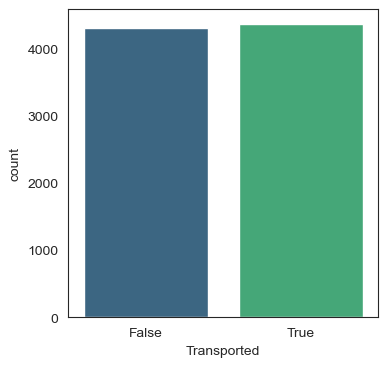

In [73]:
sns.set_style('white')
plt.figure(figsize=(4,4))
sns.countplot(x='Transported',data=train_df,palette='viridis')

In [180]:
from sklearn.preprocessing import LabelEncoder
lbl_en = LabelEncoder()
cat_cols = ['HomePlanet','Destination','cabin0','cabin_last']
for col in cat_cols:
    train_df[col] = lbl_en.fit_transform(train_df[col])
    test_df[col] = lbl_en.transform(test_df[col])

In [181]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8693 non-null   int64  
 2   CryoSleep       8693 non-null   int64  
 3   Destination     8693 non-null   int64  
 4   Age             8693 non-null   float64
 5   VIP             8693 non-null   bool   
 6   RoomService     8693 non-null   float64
 7   FoodCourt       8693 non-null   float64
 8   ShoppingMall    8693 non-null   float64
 9   Spa             8693 non-null   float64
 10  VRDeck          8693 non-null   float64
 11  Transported     8693 non-null   bool   
 12  cabin0          8693 non-null   int64  
 13  cabin_last      8693 non-null   int64  
 14  Total_spending  8693 non-null   float64
dtypes: bool(2), float64(7), int64(5), object(1)
memory usage: 900.0+ KB


In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int64  
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   bool   
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Transported                8693 non-null   bool   
 10  Total_spending             8693 non-null   float64
 11  HomePlanet_Europa          8693 non-null   bool   
 12  HomePlanet_Mars            8693 non-null   bool   
 13  Destination_PSO J318.5-22  8693 non-null   bool 

In [182]:
train_df.drop('PassengerId',axis=1,inplace=True)
test_df.drop('PassengerId',axis=1,inplace=True)

In [183]:
train_df['VIP'] = train_df['VIP'].apply(lambda x: 1 if x == True else 0)
test_df['VIP'] = test_df['VIP'].apply(lambda x: 1 if x == True else 0)

In [184]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      8693 non-null   int64  
 1   CryoSleep       8693 non-null   int64  
 2   Destination     8693 non-null   int64  
 3   Age             8693 non-null   float64
 4   VIP             8693 non-null   int64  
 5   RoomService     8693 non-null   float64
 6   FoodCourt       8693 non-null   float64
 7   ShoppingMall    8693 non-null   float64
 8   Spa             8693 non-null   float64
 9   VRDeck          8693 non-null   float64
 10  Transported     8693 non-null   bool   
 11  cabin0          8693 non-null   int64  
 12  cabin_last      8693 non-null   int64  
 13  Total_spending  8693 non-null   float64
dtypes: bool(1), float64(7), int64(6)
memory usage: 891.5 KB


In [185]:
test_df['CryoSleep'] = test_df['CryoSleep'].apply(lambda x : 1 if x == True else 0)

In [206]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      8693 non-null   int64  
 1   CryoSleep       8693 non-null   int8   
 2   Destination     8693 non-null   int64  
 3   Age             8693 non-null   int8   
 4   VIP             8693 non-null   int8   
 5   RoomService     8693 non-null   float16
 6   FoodCourt       8693 non-null   float16
 7   ShoppingMall    8693 non-null   float16
 8   Spa             8693 non-null   float16
 9   VRDeck          8693 non-null   float16
 10  Transported     8693 non-null   bool   
 11  cabin0          8693 non-null   int64  
 12  cabin_last      8693 non-null   int64  
 13  Total_spending  8693 non-null   float16
dtypes: bool(1), float16(6), int64(4), int8(3)
memory usage: 407.6 KB


In [186]:
train_df['CryoSleep'] = train_df['CryoSleep'].astype('int8')
test_df['CryoSleep'] = train_df['CryoSleep'].astype('int8')

In [187]:
train_df['VIP'] = train_df['VIP'].astype('int8')
test_df['VIP'] = train_df['VIP'].astype('int8')

In [188]:
train_df['Age'] = train_df['Age'].astype('int8')
test_df['Age'] = train_df['Age'].astype('int8')

In [189]:
float_cols = ['RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck','Total_spending']
for col in float_cols:
    train_df[col] = train_df[col].astype('float16')
    test_df[col] = test_df[col].astype('float16')

In [190]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      8693 non-null   int64  
 1   CryoSleep       8693 non-null   int8   
 2   Destination     8693 non-null   int64  
 3   Age             8693 non-null   int8   
 4   VIP             8693 non-null   int8   
 5   RoomService     8693 non-null   float16
 6   FoodCourt       8693 non-null   float16
 7   ShoppingMall    8693 non-null   float16
 8   Spa             8693 non-null   float16
 9   VRDeck          8693 non-null   float16
 10  Transported     8693 non-null   bool   
 11  cabin0          8693 non-null   int64  
 12  cabin_last      8693 non-null   int64  
 13  Total_spending  8693 non-null   float16
dtypes: bool(1), float16(6), int64(4), int8(3)
memory usage: 407.6 KB


In [191]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      4277 non-null   int64  
 1   CryoSleep       4277 non-null   int8   
 2   Destination     4277 non-null   int64  
 3   Age             4277 non-null   int8   
 4   VIP             4277 non-null   int8   
 5   RoomService     4277 non-null   float16
 6   FoodCourt       4277 non-null   float16
 7   ShoppingMall    4277 non-null   float16
 8   Spa             4277 non-null   float16
 9   VRDeck          4277 non-null   float16
 10  cabin0          4277 non-null   int64  
 11  cabin_last      4277 non-null   int64  
 12  Total_spending  4277 non-null   float16
dtypes: float16(6), int64(4), int8(3)
memory usage: 196.4 KB


In [209]:
X_train = train_df.drop('Transported',axis=1)
y_train = train_df['Transported']
X_test = test_df

In [193]:
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
X_train = st_sclr.fit_transform(X_train)
X_test = st_sclr.transform(X_test)

In [194]:
def pred_to_csv(prediction,model_name):
    new_test_df = pd.read_csv("test.csv")
    pred_df = pd.DataFrame(prediction,columns=['Transported'])
    pred_df = pd.concat([pred_df,new_test_df['PassengerId']],axis=1)
    pred_df.set_index('PassengerId',inplace=True)
    pred_df.to_csv("st_"+str(model_name)+".csv")

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [105]:
pred_dtree = dtree.predict(X_test)
pred_to_csv(pred_dtree,"Dtree1")

In [106]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# Define the hyperparameter grid for RandomizedSearchCV
random_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Define the hyperparameter grid for GridSearchCV
grid_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6),
    'max_features': ['auto', 'sqrt', 'log2', None]
}
grid = GridSearchCV(dtree,grid_param_grid,verbose=3,cv=5)
rand_grid = RandomizedSearchCV(dtree,random_param_grid,n_iter=50,verbose=3,)
grid.fit(X_train,y_train)
rand_grid.fit(X_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_feat

[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.730 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.732 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.715 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.549 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.726 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.720 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.742 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.604 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, 

[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.718 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.714 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.726 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.705 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, 

[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.690 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.596 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.661 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.718 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.640 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.715 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.559 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.655 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_sampl

[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.720 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.694 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.734 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.720 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.743 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split

[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.688 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.752 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.609 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, 

[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.721 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.719 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.763 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.741 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.703 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.704 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, 

[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.680 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.747 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.563 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=9, 

[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.725 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.715 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=6

[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.715 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.747 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split

[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.755 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=9, 

[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.730 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter

[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.723 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.726 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.732 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.713 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.661 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.714 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.582 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.712 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.746 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.753 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, 

[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.711 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.642 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.681 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.647 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8

[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.667 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.726 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.544 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.732 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.701 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.743 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.627 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.719 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.613 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=8

[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.726 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.765 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.607 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=9, sp

[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.728 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.554 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.685 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.553 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.678 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_sample

[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.710 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.611 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, sp

[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.747 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.741 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, sp

[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.566 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.725 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.675 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.558 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.729 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_sampl

[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.719 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.747 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.751 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split

[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.751 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=7, sp

[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.727 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.738 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.741 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.751 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.731 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.742 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.739 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.729 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split

[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.744 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.747 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.751 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=3, 

[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter

[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.709 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split

[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.736 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.741 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.724 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.713 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, 

[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.619 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.726 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, 

[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.763 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.612 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.606 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.730 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.776 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.746 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.759 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.631 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.743 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, 

[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.670 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.715 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.731 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.725 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.745 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split

[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.757 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.691 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.700 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.633 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8

[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.736 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.744 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.747 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.728 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=9, sp

[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.684 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.580 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.720 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.734 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.734 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_sp

[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.740 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.623 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.735 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.631 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.605 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.737 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_sampl

[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.750 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=9, 

[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.743 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.735 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.735 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.767 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split

[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.768 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=6, sp

[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=4, 

[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.751 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split

[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.743 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.768 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split

[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=r

[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.722 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.684 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.724 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.709 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split

[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.784 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.662 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.721 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.712 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.724 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split

[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.650 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.654 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.740 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split

[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.611 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.718 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.659 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.763 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.678 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.656 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.735 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.697 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split

[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.763 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.680 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.763 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.697 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, 

[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.711 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.667 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.737 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.664 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_spl

[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.713 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, sp

[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.651 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.739 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.727 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, sp

[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.706 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.762 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, 

[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.725 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, 

[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.731 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.767 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.741 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split

[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.726 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.759 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=4, 

[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split

[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.730 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=7, 

[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.797 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.786 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=4, sp

[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, spl

[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.685 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.746 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.687 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.775 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split

[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.755 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.707 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.742 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.736 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split

[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.617 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.710 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.704 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.760 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.669 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.768 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.735 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3

[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.715 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.647 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.727 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.726 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_spl

[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.716 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.729 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.735 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.645 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_sample

[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.784 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.763 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.628 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, 

[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.685 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.680 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=8, 

[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.759 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.784 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.763 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.630 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, sp

[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.767 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.773 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.633 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.727 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=6, 

[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.794 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.681 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.672 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.727 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split

[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.758 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.778 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=3

[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.772 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.789 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.797 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=2, s

[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.730 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.746 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.763 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.763 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4

[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.757 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split

[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.777 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.729 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=9, 

[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.782 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.777 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.800 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=6, sp

[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=r

[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.744 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.776 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, 

[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.771 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.713 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, sp

[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split

[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.729 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.775 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.758 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.786 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, sp

[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.768 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.726 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, sp

[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.745 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.714 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.661 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.742 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.759 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=4, 

[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.765 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.773 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, s

[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.684 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.726 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.752 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.735 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_sp

[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.760 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.716 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.680 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.622 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.693 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.742 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.755 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.724 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.767 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.751 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=7, 

[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.732 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.680 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=6, 

[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.763 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.774 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_spl

[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.773 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.784 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.794 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.802 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.742 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.754 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.772 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.775 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=9

[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.755 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_spl

[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.780 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.775 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.789 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, sp

[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_spl

[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.782 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.794 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, sp

[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.773 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.781 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.722 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, sp

[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.718 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, sp

[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.770 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.696 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, 

[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.755 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.765 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, sp

[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.696 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.740 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.690 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.702 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.691 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.738 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.722 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.744 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.681 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=7

[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.745 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.767 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.733 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=5, 

[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.743 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.752 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.730 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.776 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, 

[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.746 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split

[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.741 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, 

[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.794 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, sp

[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.775 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.711 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, 

[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.700 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.769 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=2, s

[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.754 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.769 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.778 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split

[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.773 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.775 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, sp

[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.794 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.765 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split

[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.776 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=4, sp

[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.797 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.725 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.763 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=2

[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.766 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9

[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, 

[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.743 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.770 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.760 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.747 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.690 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.673 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.776 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_sample

[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.773 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.717 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.707 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.758 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.722 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samp

[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.755 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.760 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.730 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.714 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.767 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.784 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.776 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_spli

[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.726 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.691 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.734 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samp

[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.765 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.789 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.775 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_sp

[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.765 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.768 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.749 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.752 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.768 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_sample

[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.776 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.776 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.720 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.726 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_

[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_spli

[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.724 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.761 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.747 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.789 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_sp

[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.707 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.758 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.773 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samp

[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.742 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.759 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.766 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_

[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.797 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.761 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.780 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.758 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_

[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.789 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.718 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.770 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.763 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_

[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.781 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_sp

[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.751 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.770 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samp

[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_

[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.759 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.766 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.732 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.745 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.727 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.782 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_

[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.723 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.752 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.724 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_sa

[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.768 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.789 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.708 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_spli

[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.730 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.751 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.736 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_sample

[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.749 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.712 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.739 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.736 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samp

[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.768 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.715 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.766 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.707 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.689 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_spli

[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.684 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.774 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_

[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.749 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.719 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.694 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.743 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.749 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_sample

[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.776 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_sp

[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.781 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_sample

[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.762 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.781 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.776 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.792 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.773 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_

[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.789 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.773 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_

[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.797 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.759 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samp

[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samp

[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=2, spl

[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.768 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.725 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.749 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.712 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.704 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.773 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.731 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.747 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.756 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_sample

[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.740 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.732 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.759 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.754 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_

[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.763 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.730 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_spli

[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.765 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.749 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.713 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_

[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.742 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_spli

[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.728 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.746 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_

[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.714 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.755 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_sample

[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.765 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_

[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.761 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.770 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.766 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.730 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_spli

[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.796 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.747 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.740 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.721 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_

[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.699 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.755 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.782 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_sampl

[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.768 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.773 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.697 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.749 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.720 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_

[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.751 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.780 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.768 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_sample

[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.777 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_

[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_sample

[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.784 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.734 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.777 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.794 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_sample

[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.792 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, mi

[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.789 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.763 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.761 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_

[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.774 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_spli

[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, spli

[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.735 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.745 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.741 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_

[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.749 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.773 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.735 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.734 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_spli

[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.742 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.763 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.765 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_sampl

[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_sample

[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.765 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_spli

[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.760 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.740 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.727 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.734 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samp

[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.743 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.768 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_

[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.776 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samp

[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.718 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.711 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.735 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.755 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samp

[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.742 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.733 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.721 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.758 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_

[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.732 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.742 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.776 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.695 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_spli

[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.773 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_

[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_

[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.776 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.773 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples

[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samp

[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samp

[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.779 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.797 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.789 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samp

[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.781 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.762 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.789 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.773 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samp

[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.743 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_sample

[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_spli

[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.763 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples

[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.756 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_

[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.768 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.726 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.694 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.760 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.773 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.690 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.751 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.729 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_

[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.742 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.773 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.760 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_sp

[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.743 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.740 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.747 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.781 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.734 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.739 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_sample

[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.768 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.755 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.709 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.723 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_

[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.760 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.766 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_

[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.724 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.742 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.739 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.734 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samp

[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.706 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.735 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samp

[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.725 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.684 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.747 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, mi

[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.715 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.739 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.747 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samp

[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samp

[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samp

[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.765 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.780 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_

[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.770 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_

[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.776 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.773 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_

[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_

[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samp

[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.599 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.545 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.739 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.709 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_sampl

[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.596 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.649 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.712 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.697 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.728 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.661 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.735 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.721 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.730 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.570 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, mi

[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.685 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.528 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.605 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, 

[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.726 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.575 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, mi

[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.730 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.726 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.633 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, 

[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.690 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.736 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.704 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.723 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.701 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, 

[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.561 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.715 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.734 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.541 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.546 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, 

[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.727 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.707 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.736 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.703 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.539 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5

[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.715 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1

[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.726 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2

[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.715 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.736 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samp

[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.736 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.715 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.731 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.755 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.740 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.715 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.736 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.755 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf

[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_

[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.741 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.648 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.649 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.727 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.678 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.640 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.631 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.744 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, mi

[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.717 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.536 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.744 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.725 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.739 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_lea

[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.609 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.739 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.753 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.747 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=

[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.723 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.638 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.596 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.729 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5

[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.671 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.646 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.620 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.627 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_le

[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.715 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.727 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.717 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.647 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.712 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.611 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.733 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.747 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.706 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.729 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.698 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.756 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.747 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.601 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, mi

[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.643 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.692 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.747 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.729 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, m

[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.747 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, m

[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.726 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.735 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_le

[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.733 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.726 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2

[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.721 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.745 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, 

[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.747 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, mi

[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_sa

[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.583 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.612 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.649 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.718 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.714 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.729 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2

[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.734 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.759 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.763 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.712 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.673 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, 

[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.698 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.742 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.695 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, mi

[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.591 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.686 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.680 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.598 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.686 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.736 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.739 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.747 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, mi

[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.684 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.657 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.735 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.712 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.641 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.717 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.722 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.758 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.710 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.742 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.607 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4

[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.742 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.685 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.658 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, 

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, mi

[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.719 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.754 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.741 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.722 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.739 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_sample

[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.743 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.739 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf

[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, 

[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_sa

[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.728 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.650 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.723 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.743 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.720 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.733 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.760 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.735 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.599 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.698 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.718 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.736 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.607 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, mi

[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.745 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.756 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.642 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, mi

[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.720 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.747 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, m

[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.747 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=

[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.694 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.752 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, 

[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.629 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.761 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.766 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, 

[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.595 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, mi

[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.719 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.731 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.707 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, 

[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.784 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, 

[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.784 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, 

[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, 

[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.781 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.734 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.743 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, 

[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.744 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, 

[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.722 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, 

[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, 

[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.739 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.744 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, 

[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samp

[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.771 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.599 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, mi

[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.743 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.756 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.735 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.747 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.706 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2

[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.759 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3

[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.713 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.733 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.638 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samp

[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.711 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.681 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.735 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.614 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.670 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.730 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.669 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.736 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.740 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.739 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.755 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, 

[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.740 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.740 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.738 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.677 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf

[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.741 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.660 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, 

[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.735 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.658 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.721 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.727 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.742 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.760 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.759 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=

[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.715 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.706 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.694 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.722 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.796 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.742 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.739 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1

[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.769 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.770 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.797 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, mi

[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.769 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.770 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.796 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, mi

[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.726 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.747 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.752 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.773 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.797 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, mi

[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.776 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.796 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, mi

[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_sp

[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.763 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.698 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.673 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.717 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1

[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.780 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.731 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.702 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, 

[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.584 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.710 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.744 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf

[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.741 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.739 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.727 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.702 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.723 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.678 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.733 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.729 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.730 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.763 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.712 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.733 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1

[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.771 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.685 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.760 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.712 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, 

[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.735 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.744 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.734 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.610 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.779 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.727 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.720 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.730 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.781 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.794 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.794 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.735 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1

[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.754 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2

[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.794 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.792 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3

[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.730 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.729 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4

[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.774 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.794 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.794 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, mi

[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.743 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5

[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_

[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.762 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.715 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, mi

[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.758 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.792 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.778 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.726 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.745 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, 

[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.773 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.692 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.721 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.735 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.700 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.770 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.773 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.697 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.715 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, 

[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.729 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.674 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.683 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.707 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.747 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.731 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.740 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.760 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.763 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, mi

[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.765 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.741 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.700 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2

[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.789 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.735 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.733 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.666 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samp

[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.762 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.766 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.773 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, mi

[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.711 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.734 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.705 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, mi

[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.750 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.789 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.786 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, mi

[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.789 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.773 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.747 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.776 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.775 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.734 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, mi

[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.776 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.794 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.789 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, 

[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, m

[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.740 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.747 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_lea

[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.736 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.726 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.775 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples

[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.711 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.773 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.781 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_lea

[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.712 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_lea

[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.763 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_l

[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.726 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.719 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.736 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_sam

[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.732 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.770 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_lea

[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.767 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.707 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.734 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_s

[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.773 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.693 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.741 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_sam

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.743 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.721 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.773 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_sampl

[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.734 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.741 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.775 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.770 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.781 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.699 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_l

[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.776 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.720 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.740 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.699 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples

[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.694 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.744 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.747 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_sampl

[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.715 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.721 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.733 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.638 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_sam

[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.789 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.773 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.781 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.794 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.794 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.776 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.796 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.792 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.786 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.767 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples

[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.784 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_sam

[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=3, m

[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.751 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.745 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.726 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_sampl

[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.736 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.716 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_sampl

[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.773 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.767 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.678 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_l

[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.771 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_lea

[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.751 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.747 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.739 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samp

[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.767 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.731 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.728 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_sam

[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.776 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.722 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.741 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.741 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_sampl

[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.725 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.673 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.727 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.740 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min

[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.735 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.776 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.688 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.770 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.776 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.771 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_sam

[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.759 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.756 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.720 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.765 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.781 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.679 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.789 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.662 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_sam

[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.765 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_l

[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.770 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_sampl

[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.794 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.779 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.779 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_sam

[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.798 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.731 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.798 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.773 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.798 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.755 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_sam

[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.797 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.778 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.799 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.778 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.780 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.779 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_sam

[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=

[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.727 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_sam

[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.732 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.710 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples

[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.685 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.767 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.771 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples

[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.740 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.721 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_sam

[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.732 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.729 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples

[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.751 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.789 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.759 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_l

[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.776 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.696 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_lea

[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.747 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_lea

[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.715 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.760 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.743 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_sam

[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.747 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.648 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.730 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_l

[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.737 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_sampl

[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.726 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.735 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_sampl

[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.776 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.771 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.709 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_lea

[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.695 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.728 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_sam

[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.730 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.726 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.739 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_sam

[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.773 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_l

[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.774 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.797 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_sampl

[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.763 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_lea

[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples

[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.792 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.773 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_sampl

[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_sam

[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_sam

[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_sam

[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_s

[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.745 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.747 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_sam

[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.735 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.766 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_sampl

[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.781 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.741 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.768 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_lea

[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.711 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.651 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.751 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_sampl

[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.728 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.702 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.726 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_sampl

[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_l

[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.700 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_lea

[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.747 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.756 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_sam

[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.770 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.724 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.722 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples

[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.755 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.742 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.763 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_lea

[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.744 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.746 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.710 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_sam

[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.755 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.726 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.736 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.749 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_sampl

[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.749 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_l

[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.730 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.765 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_lea

[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.768 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.789 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_sam

[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.784 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.776 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_sam

[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.771 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.757 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.794 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_sampl

[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.797 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.784 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.773 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.749 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.794 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_s

[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.778 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.776 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples

[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.789 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_lea

[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.735 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.755 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.731 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_sampl

[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.743 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.770 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.776 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_l

[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.776 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples

[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.763 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples

[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.718 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.668 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.720 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_sampl

[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_l

[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.732 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.773 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_sampl

[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.711 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.723 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.731 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_sampl

[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.723 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.776 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_l

[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.642 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples

[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.733 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.760 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_sam

[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.755 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.773 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples

[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.742 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.744 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.759 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.754 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_lea

[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.765 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.755 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.773 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_l

[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.755 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.780 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.749 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.779 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.761 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.751 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples

[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_l

[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.767 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.796 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_

[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.784 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.768 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=

[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.781 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_spli

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'splitter': ['best', 'random']},
                   verbose=3)

In [107]:
pred_dtree_grid = grid.predict(X_test)
pred_to_csv(pred_dtree_grid,"DTREE_GRID")

In [108]:
pred_dtree_rand = rand_grid.predict(X_test)
pred_to_csv(pred_dtree_rand,"DTREE_Rand")

In [195]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
pred_to_csv(pred_rfc,"RFC2")

In [196]:
from sklearn.model_selection import RandomizedSearchCV
random_grid ={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

#for GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rfc_random.fit(X_train,y_train)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   5.1s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   4.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   8.8s
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   9.1s
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.8s
[CV] END bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.8s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   8.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [197]:
pred_rfc = rfc_random.predict(X_test)
pred_to_csv(pred_rfc,"RFC Random")

In [198]:
grid_rfc = grid_search.predict(X_test)
pred_to_csv(grid_rfc,"RFC Grid")

In [200]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
pred_lg = lg.predict(X_test)
pred_to_csv(pred_lg,"Logistic")

In [202]:
random_param_grid_lg = {
    'penalty': ['l2', 'none'], 
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': np.arange(100, 1000, 100),
    'random_state': [42]
}

grid_param_grid_lg = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'random_state': [42]
}


# Create a RandomizedSearchCV instance
random_search_lg = RandomizedSearchCV(lg, random_param_grid_lg, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Create a GridSearchCV instance
grid_search_lg = GridSearchCV(lg, grid_param_grid_lg, cv=5, n_jobs=-1)
random_search_lg.fit(X_train,y_train)
grid_search_lg.fit(X_train,y_train)

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `p

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `p

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `p

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `p

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `p

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `p

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `p

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `p

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `p

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 300, 400, 500],
                         'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [210]:
pred_lg_grid = grid_search_lg.predict(X_test)
pred_to_csv(pred_lg_grid,"Logistic_Grid")

In [215]:
train_df.drop(['cabin0','cabin_last'],axis=1,inplace=True)
test_df.drop(['cabin0','cabin_last'],axis=1,inplace=True)

In [226]:
X_train = train_df.drop('Transported',axis=1)
y_train = train_df['Transported']
X_test = test_df

In [227]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)

In [228]:
from catboost import CatBoostClassifier

In [241]:

parameters = {
    'iterations': 250,                
    'learning_rate': 0.001,               
    'depth': 9,                         
    'l2_leaf_reg': 3,                   
    'bagging_temperature': 1.0,         # Controls intensity of Bayesian bagging
    'border_count': 254,                # Number of splits for numerical features         # Indices of categorical features in the input data
    'thread_count': 4,                  # Number of parallel threads used for training
    'random_seed': 42,                  # Seed for random number generator for reproducibility
    'loss_function': 'Logloss',         # Loss function to optimize during training
    'eval_metric': 'AUC',               # Metric used for evaluation
    'custom_metric': ['Accuracy', 'AUC'], # Additional metrics to be evaluated during training
    'use_best_model': True,            
    'od_type': 'Iter',                  
    'verbose': True              
}

In [242]:
model = CatBoostClassifier(
    **parameters
    
)
model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8445952	best: 0.8445952 (0)	total: 4.55ms	remaining: 1.13s
1:	test: 0.8533019	best: 0.8533019 (1)	total: 8.37ms	remaining: 1.04s
2:	test: 0.8561437	best: 0.8561437 (2)	total: 12.1ms	remaining: 992ms
3:	test: 0.8651749	best: 0.8651749 (3)	total: 15.4ms	remaining: 950ms
4:	test: 0.8681511	best: 0.8681511 (4)	total: 19ms	remaining: 929ms
5:	test: 0.8659814	best: 0.8681511 (4)	total: 20.4ms	remaining: 830ms
6:	test: 0.8661171	best: 0.8681511 (4)	total: 23.6ms	remaining: 820ms
7:	test: 0.8687596	best: 0.8687596 (7)	total: 26.7ms	remaining: 807ms
8:	test: 0.8672381	best: 0.8687596 (7)	total: 29.8ms	remaining: 799ms
9:	test: 0.8689225	best: 0.8689225 (9)	total: 33.1ms	remaining: 795ms
10:	test: 0.8697038	best: 0.8697038 (10)	total: 36.6ms	remaining: 795ms
11:	test: 0.8701176	best: 0.8701176 (11)	total: 40ms	remaining: 793ms
12:	test: 0.8694892	best: 0.8701176 (11)	total: 43.1ms	remaining: 785ms
13:	test: 0.8695416	best: 0.8701176 (11)	total: 46.1ms	remaining: 777ms
14:	test: 0.8691

In [243]:
pred_cat = model.predict(X_test)
pred_to_csv(pred_cat,"CATBOOSt3")